<a href="https://colab.research.google.com/github/rwcitek/Data-Science-Foundations-Data-Mining-in-Python/blob/rwc-01/Ex_Files_Data_Mining_Python_R/Exercise%20Files/Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIME-SERIES DECOMPOSITION

**File:** Decomposition.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from statsmodels.tsa.seasonal import seasonal_decompose

# LOAD AND PREPARE DATA

In [2]:
# df = pd.read_csv('data/AirPassengers.csv', parse_dates=['Month'], index_col=['Month'])

In [3]:
!Rscript -e "print(AirPassengers)" > air_passengers.txt

df = (
  pd
  .read_csv("air_passengers.txt", sep=r'\s+')
  .melt(
    var_name='_',
    value_name='#Passengers',
    ignore_index = False,
  )
  .set_index('_', append=True)
  .assign( Month = lambda x: [ pd.to_datetime(f"{i[0]}-{i[1]}") for i in x.index ] )
  .set_index('Month')
  .sort_index()
)
df.shape


(144, 1)

In [4]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


# PLOT DATA

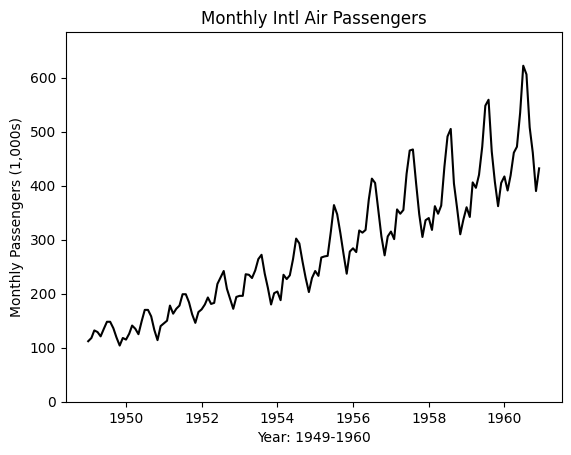

In [6]:
fig, ax = plt.subplots()
plt.xlabel('Year: 1949-1960')
plt.ylabel('Monthly Passengers (1,000s)')
plt.title('Monthly Intl Air Passengers')
plt.plot(df, color='black')
plt.ylim(0,df["#Passengers"].max()*1.10)
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# DECOMPOSE TIME SERIES

- Decompose the time series into three components: trend, seasonal, and residuals or noise.
- This commands also plots the components.
- The argument `period` specifies that there are 12 observations (i.e., months) in the cycle.
- By default, `seasonal_decompose` performs an additive (as opposed to multiplicative) decomposition.

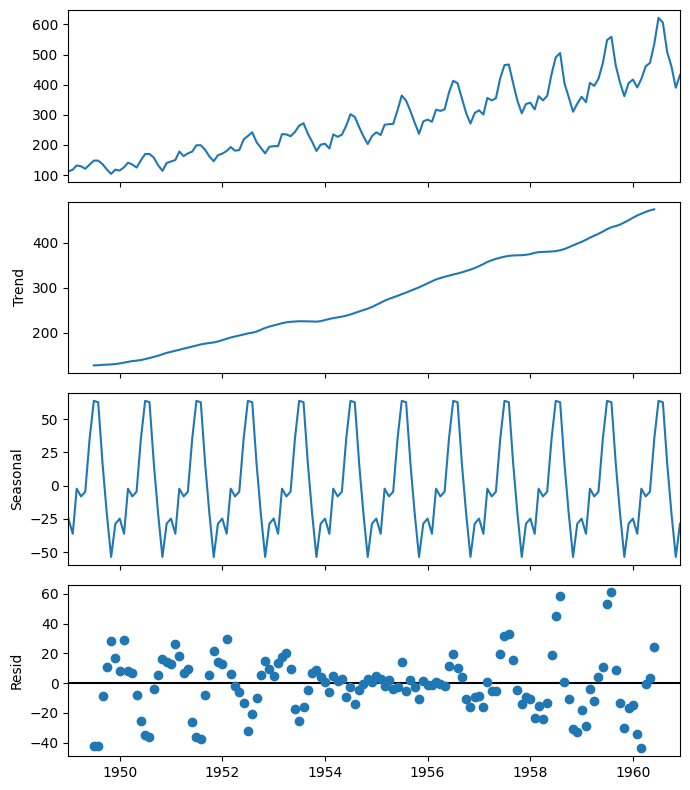

In [7]:
# Set the figure size
plt.rcParams['figure.figsize'] = [7, 8]

# Plot the decomposition components
sd = seasonal_decompose(df, period=12).plot()

- For growth over time, it may be more appropriate to use a multiplicative trend.
- The approach can show consistent changes by percentage.
- In this approach, the residuals should be centered on 1 instead of 0.

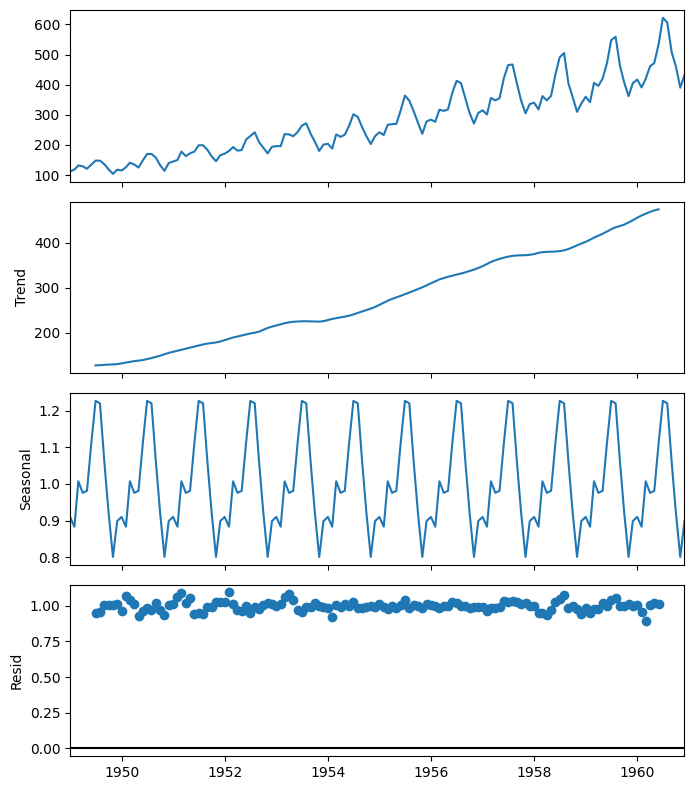

In [8]:
sd = seasonal_decompose(df, model='multiplicative').plot()

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear.
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.